Notebook por Daniel Florea - 2024-1

# **AYUDANTÍA #9:** Support Vector Machines
## Ayudantes:
#### Daniel Alegría
#### Ignacio Garrido

<!-- ![a](https://www.edureka.co/blog/wp-content/uploads/2019/11/svm-2.png) -->
<img src="https://www.edureka.co/blog/wp-content/uploads/2019/11/svm-2.png" width="40%" />

Uno de los métodos de clasificación más populares hoy en día corresponden a las [Support Vector Machines](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47) (o *Máquinas Vectoriales de Soporte* en español). El algoritmo destaca por la calidad de sus clasificaciones sin necesidad de tomar tanto poder computacional y la relativa simpleza de su implementación.

## 1. ¿Qué es una SVM?

En términos generales, el algoritmo nos permite encontrar una línea (o hiperplano, dependiendo de la dimensionalidad de los datos) que separa entre dos (o más) clases mediante un problema de optimización.

### 1.1 SVM Lineal

Es la implementación más simple de este algoritmo; la línea de decisión toma la forma de una recta (o plano) y se traza en el mismo espacio dimensional que en el que se encuentran los datos.

<!-- ![a](resources/vectores_soporte.png) -->
<p align="center">
    <img src="https://live.staticflickr.com/65535/32848644557_b257479baa_c.jpg" width="35%" />
</p>

Definimos como vectores de soporte a aquellos puntos de cada clase que se encuentren a la mínima distancia de la línea de decisión. Algo importante a saber sobre estos puntos es que todos se encuentran a una misma distancia de ella.

Por cada iteración que pase, el algoritmo tratará de maximizar esta distancia (es decir, encontrar la línea que más separe las clases).

### 1.2 SVM no Lineales

Lamentablemente, los datos con cuales trabajamos no siempre pueden ser separados por una recta. Para estos casos deberemos primero encontrar una transformación que nos permita llevar los datos a un espacio en que si sean separables y luego llevaremos a cabo el mismo proceso que para una SVM lineal.

<!-- ![a](https://miro.medium.com/v2/resize:fit:1196/1*ndI3lQT-sKIGXpwmExm1WA.png) -->
<p align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1196/1*ndI3lQT-sKIGXpwmExm1WA.png" width="35%" />
</p>

Llamaremos *kernel* a el tipo de transformación que vamos a aplicar sobre los datos, distintos kernels permiten proyectar los datos de formas distintas, al trazar una recta en este nuevo espacio obtendremos una línea de decisión curva en el espacio original.

<!-- ![a](https://www.researchgate.net/publication/4344800/figure/fig1/AS:670713031700484@1536921856291/Basic-idea-of-kernel-function-in-SVM.png) -->
<p align="center">
    <img src="https://www.researchgate.net/publication/4344800/figure/fig1/AS:670713031700484@1536921856291/Basic-idea-of-kernel-function-in-SVM.png" width="35%" />
</p>

<!-- ![a](https://miro.medium.com/max/1400/1*gXvhD4IomaC9Jb37tzDUVg.png) -->

Notamos que la transformación no necesariamente tiene que ser a un espacio de igual dimensionalidad que el original. En este caso, tenemos una transformación que permite separar los datos mediante un plano en un espacio tridimensional:

<p align="center">
    <img src="https://miro.medium.com/max/1400/1*gXvhD4IomaC9Jb37tzDUVg.png" width="45%" />
</p>

## 2. [Implementación en scikit-learn](https://scikit-learn.org/stable/modules/svm.html)

La librería [scikit-learn](https://scikit-learn.org/stable/) contiene una implementación del algoritmo detrás de las SVM bajo el nombre de [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (Support Vector Classifier), que nos permite fácilmente elegir un kernel y entrenar un modelo para clasificar un conjunto de datos.

### 2.1 Uso básico de la función

In [1]:
# Implementación de SVM en sklearn
from sklearn import svm
from sklearn.metrics import accuracy_score

# Utilizamos estos métodos para generar conjuntos de datos
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

# Utilizamos esta librería para graficar los datos
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
classifier = svm.SVC()  # Instancia del clasificador, por defecto crea un SVM de kernel rbf (radial basis function)
classifier

SVC()

Para ejemplificar el funcionamiento del clasificador, generaremos un conjunto simple de datos con alta separabilidad:

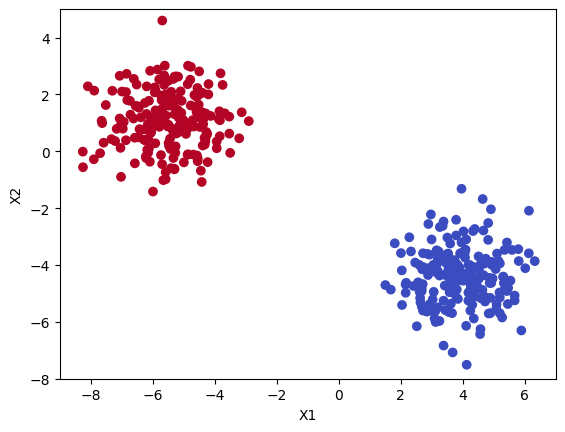

In [3]:
x_min, x_max = -9, 7
y_min, y_max = -8, 5

# Generamos un conjunto de datos para poder clasificar
X_blob, y_blob = make_blobs(n_samples = 400, centers = 2, cluster_std = 1, n_features = 2, random_state = 123)

# Graficamos los datos originales
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap=plt.cm.coolwarm)

# Detalles del plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

Entrenamos el modelo sobre los datos utilizando el método ``.fit()``

In [4]:
classifier.fit(X_blob, y_blob)

SVC()

Ahora, visualizamos la clasificación realizada:

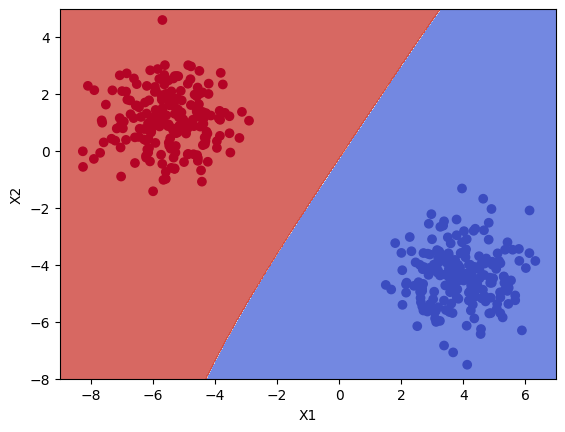

In [5]:
# Mediante estas líneas podemos colorear el todo el plot con las decisiones
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficamos los datos originales
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.coolwarm)

# Detalles del plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### 2.2 Kernels disponibles y parámetros

[Scikit-learn nos permite escoger entre 4 funciones de *kernel* distintas](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), estas siendo [‘linear’, ‘poly’, ‘rbf’ y ‘sigmoid’] (también existe el kernel ‘precomputed’, pero no entraremos en detalle sobre como usarlo). Cada uno de estos kernels posee sus propios parámetros para su implementación, a continuación estudiaremos cada uno de ellos en detalle y qué significa cada uno de sus parámetros.

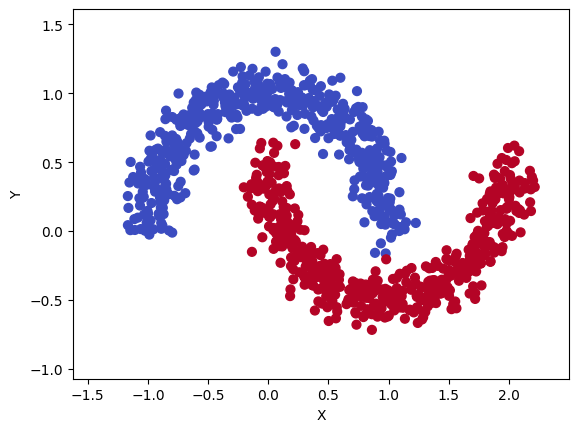

In [6]:
# Generamos un conjunto de datos para ajustar nuestros clasificadores
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 123)

h = .02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X, y = make_moons(n_samples = 1000, noise = 0.1)
plt.scatter(X[:, 0], X[:, 1], s = 40, c = y, cmap=plt.cm.coolwarm)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### 2.2.1 Kernel Lineal

Seleccionado con el argumento ``'linear'``, corresponde a la implementación pura de SVM, no se aplican transformaciones sobre los datos y simplemente se traza una recta como línea de decisión.

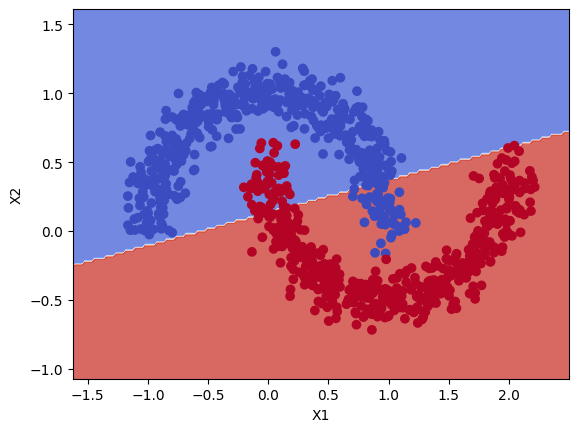

In [7]:
# Instanciamos el clasificador
linear_classifier = svm.SVC(kernel = "linear")

# Ajustamos el clasificador a los datos
linear_classifier.fit(X, y)
svm_classifier = linear_classifier

# Mediante estas líneas podemos colorear el todo el plot con las decisiones
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficamos los datos originales
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

# Detalles del plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

#### 2.2.2 Kernel Polinomial

Seleccionado con el argumento ``'poly'``, permite llevar los datos a distintos espacios polinomiales cuyo grado dependerá del parámetro ``degree`` que le entreguemos

*(Nota: Este kernel también tiene acceso a los parámetros ``gamma`` y ``C``, los cuales serán explicados en el siguiente kernel)*

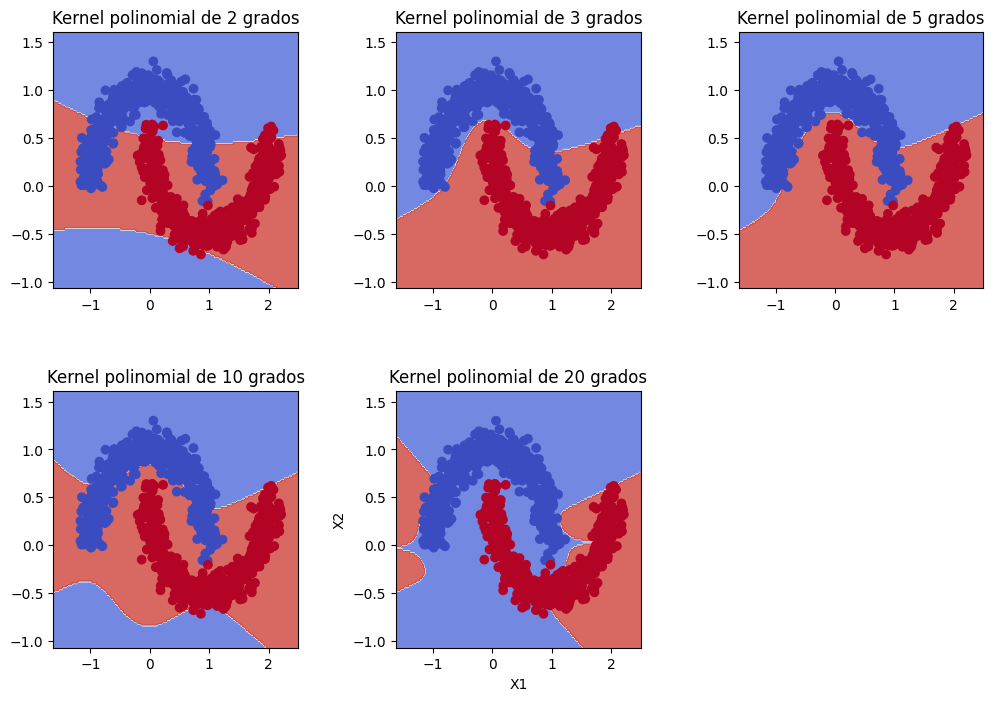

In [8]:
# Distintos grados para los espacios en que llevaremos los datos
degrees = [2, 3, 5, 10, 20]
plt.figure(figsize=(12, 8))
i = 0

for deg in degrees:
    plt.subplot(2, 3, i + 1)
    i += 1
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Instanciamos el clasificador
    poly_classifier = svm.SVC(kernel = "poly", degree = deg)

    # Ajustamos el clasificador a los datos
    poly_classifier.fit(X, y)
    svm_classifier = poly_classifier

    # Mediante estas líneas podemos colorear el todo el plot con las decisiones
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Graficamos los datos originales
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(f"Kernel polinomial de {deg} grados")

# Detalles del plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

#### 2.2.3 Kernel RBF

Seleccionado con el argumento ``'rbf'``, permite llevar utilizar el kernel de Radial Basis Function. Este dependerá de [dos parámetros](https://scikit-learn.org/0.15/auto_examples/svm/plot_rbf_parameters.html): ``gamma``, que determina "el radio" que influyen cada dato en la clasificación (un gamma pequeño significa que influye hasta más lejos, mientras que un gamma más alto hace que influya desde más cerca). Por otro lado, el parámetro ``C`` representa el tradeoff entre tener una superficie lisa y clasificar todo perfectamente (lo que puede generar sobreentrenamiento).

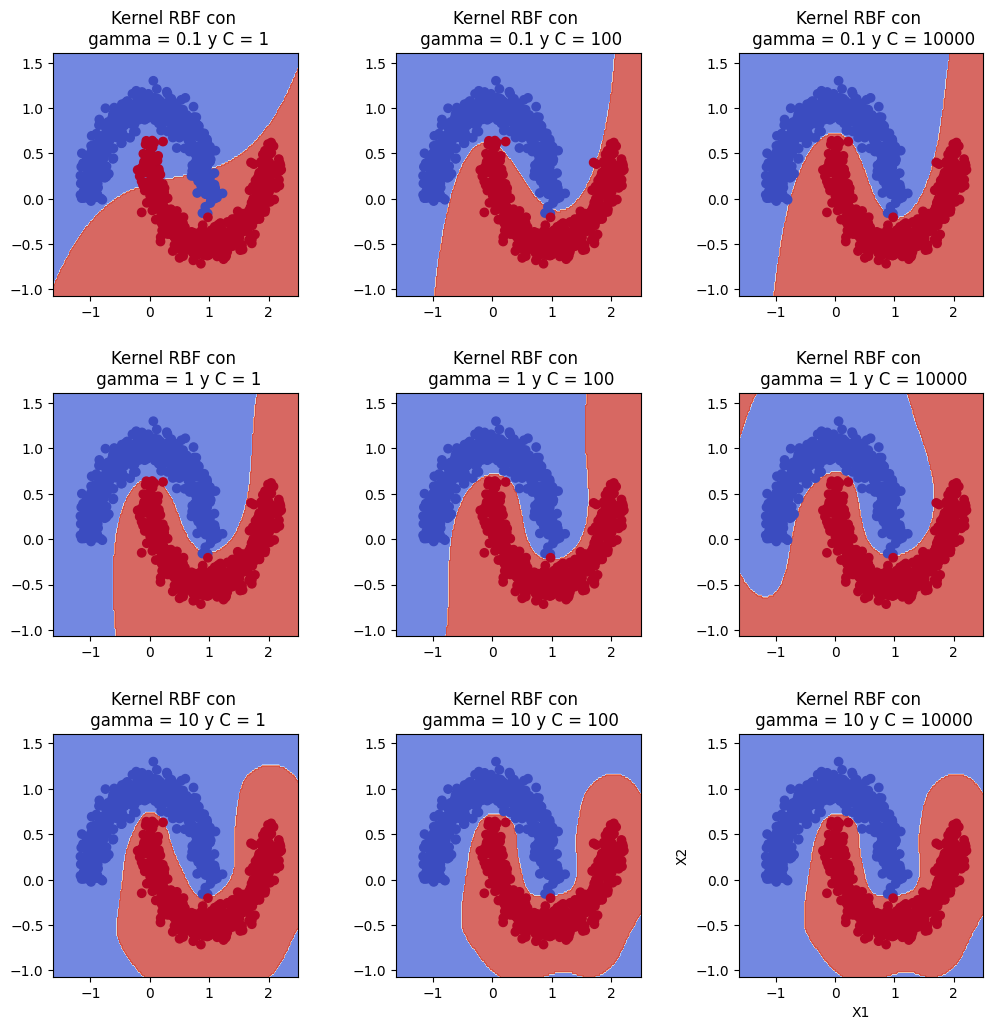

In [9]:
# Distintos grados para los espacios en que llevaremos los datos
gamma_list = [0.1, 1, 10]
c_list = [1, 100, 10000]

plt.figure(figsize=(12, 12))
i = 0

for gamma in gamma_list:
    for c in c_list:
        plt.subplot(3, 3, i + 1)
        i += 1
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        # Instanciamos el clasificador
        rbf_classifier = svm.SVC(kernel = "rbf", gamma = gamma, C = c)

        # Ajustamos el clasificador a los datos
        rbf_classifier.fit(X, y)
        svm_classifier = rbf_classifier

        # Mediante estas líneas podemos colorear el todo el plot con las decisiones
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Graficamos los datos originales
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.title(f"Kernel RBF con \n gamma = {gamma} y C = {c}")

# Detalles del plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

#### 2.2.4 Kernel Sigmoidal

Seleccionado con el argumento ``'sigmoid'``, permite llevar utilizar el kernel con función sigmoide. Este kernel también es configurable mediante los mismos [dos parámetros](https://scikit-learn.org/0.15/auto_examples/svm/plot_rbf_parameters.html) que el kernel RBF ``gamma`` y ``C``.

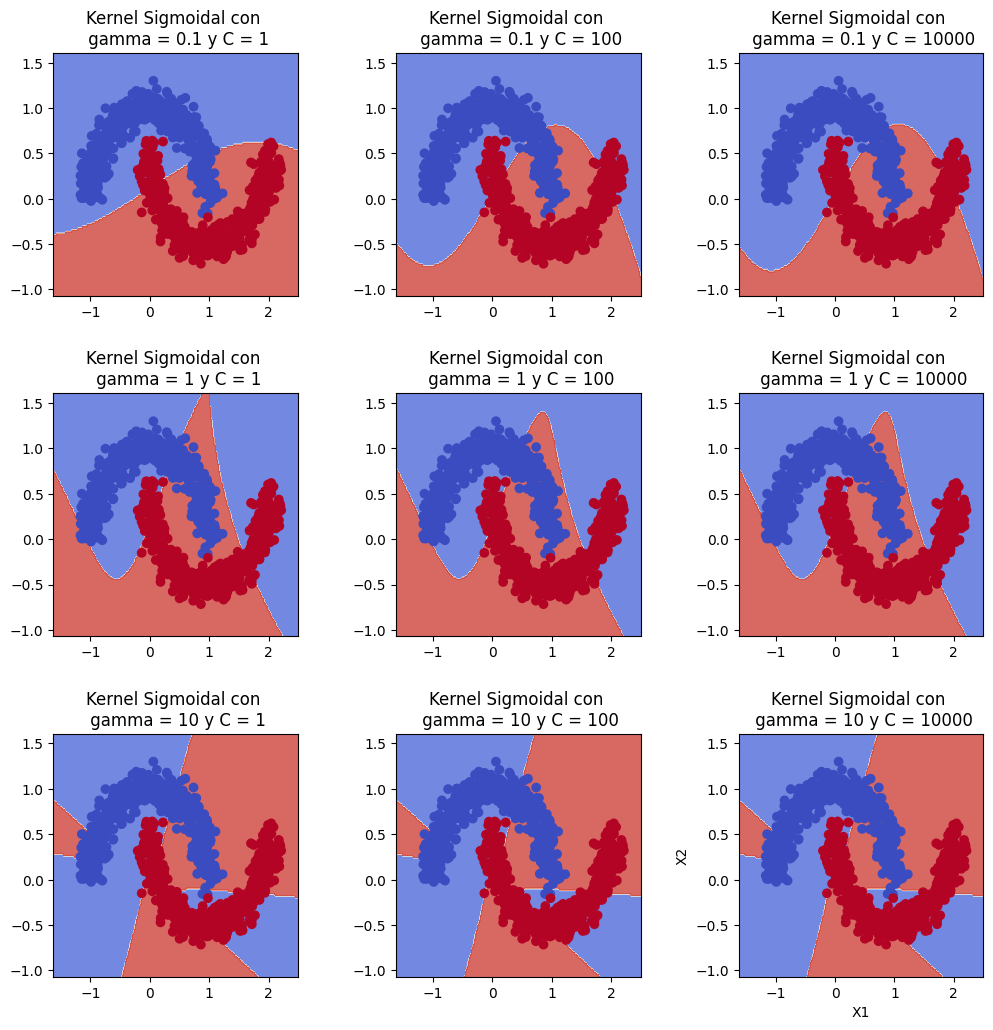

In [10]:
# Distintos grados para los espacios en que llevaremos los datos
gamma_list = [0.1, 1, 10]
c_list = [1, 100, 10000]

plt.figure(figsize=(12, 12))
i = 0

for gamma in gamma_list:
    for c in c_list:
        plt.subplot(3, 3, i + 1)
        i += 1
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        # Instanciamos el clasificador
        sigmoid_classifier = svm.SVC(kernel = "sigmoid", gamma = gamma, C = c)

        # Ajustamos el clasificador a los datos
        sigmoid_classifier.fit(X, y)
        svm_classifier = sigmoid_classifier

        # Mediante estas líneas podemos colorear el todo el plot con las decisiones
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Graficamos los datos originales
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.title(f"Kernel Sigmoidal con \n gamma = {gamma} y C = {c}")

# Detalles del plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

## 3. ¿Cuándo utilizar cada Kernel?

Generalmente no existe una forma de determinar qué kernel utilizar para cada aplicación (lo que no quiere decir que no hayan casos en que sí), normalmente la opción más simple para cada aplicación suele ser la más acertada.

Para datos que visiblemente se puede apreciar que pueden ser separados por una recta (o un plano), siempre se recomienda optar por la alternativa más simple, el kernel lineal. Ahora bien, como notamos anteriormente, este kernel no es muy efectivo para datos organizados en formas curvas o que contengan a fracciones del resto. Normalmente para estas aplicaciones kernels como el sigmoidal, polinomial y RBF son bastante efectivo (especialmente el RBF, que es frecuentemente el más utilizado).

De todos modos, siempre es una buena idea probar con todos y escoger aquel que obtenga mejor desempeño con los datos, aquí hay un ejemplo de como hacerlo.

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [12]:
# Cargamos el dataset wine de sklearn
wine = datasets.load_wine()

X = wine.data
y = wine.target

In [ ]:
# El dataset contiene 13 características de 150 plantas, con un total de 3 tipos de plantas a clasificar según esta información
print("Número de ejemplos:", X.shape[0])
print("Número de características por ejemplo:", X.shape[1])
print("Número de clases:", np.unique(y).shape[0])

Número de ejemplos: 178
Número de características por ejemplo: 13
Número de clases: 3


Ahora, separaremos el set de datos entre train y test, realizando un análisis en solo el conjunto de entrenamiento.

In [14]:
# Separamos entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)  # Set de testeo relativamente pequeño porque tenemos pocos datos

In [15]:
# Normalizamos los datos segun los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Al tener 13 características de cuales elegir, notamos que no es fácil visualizar la información del set de datos (y por ende, no podemos definir qué kernel podría ser más útil).

Una forma de lidiar con esto sería ver si algun par de características dentro de él separa de forma ideal y solo utilizar esas dos para llevar a cabo la clasificación:

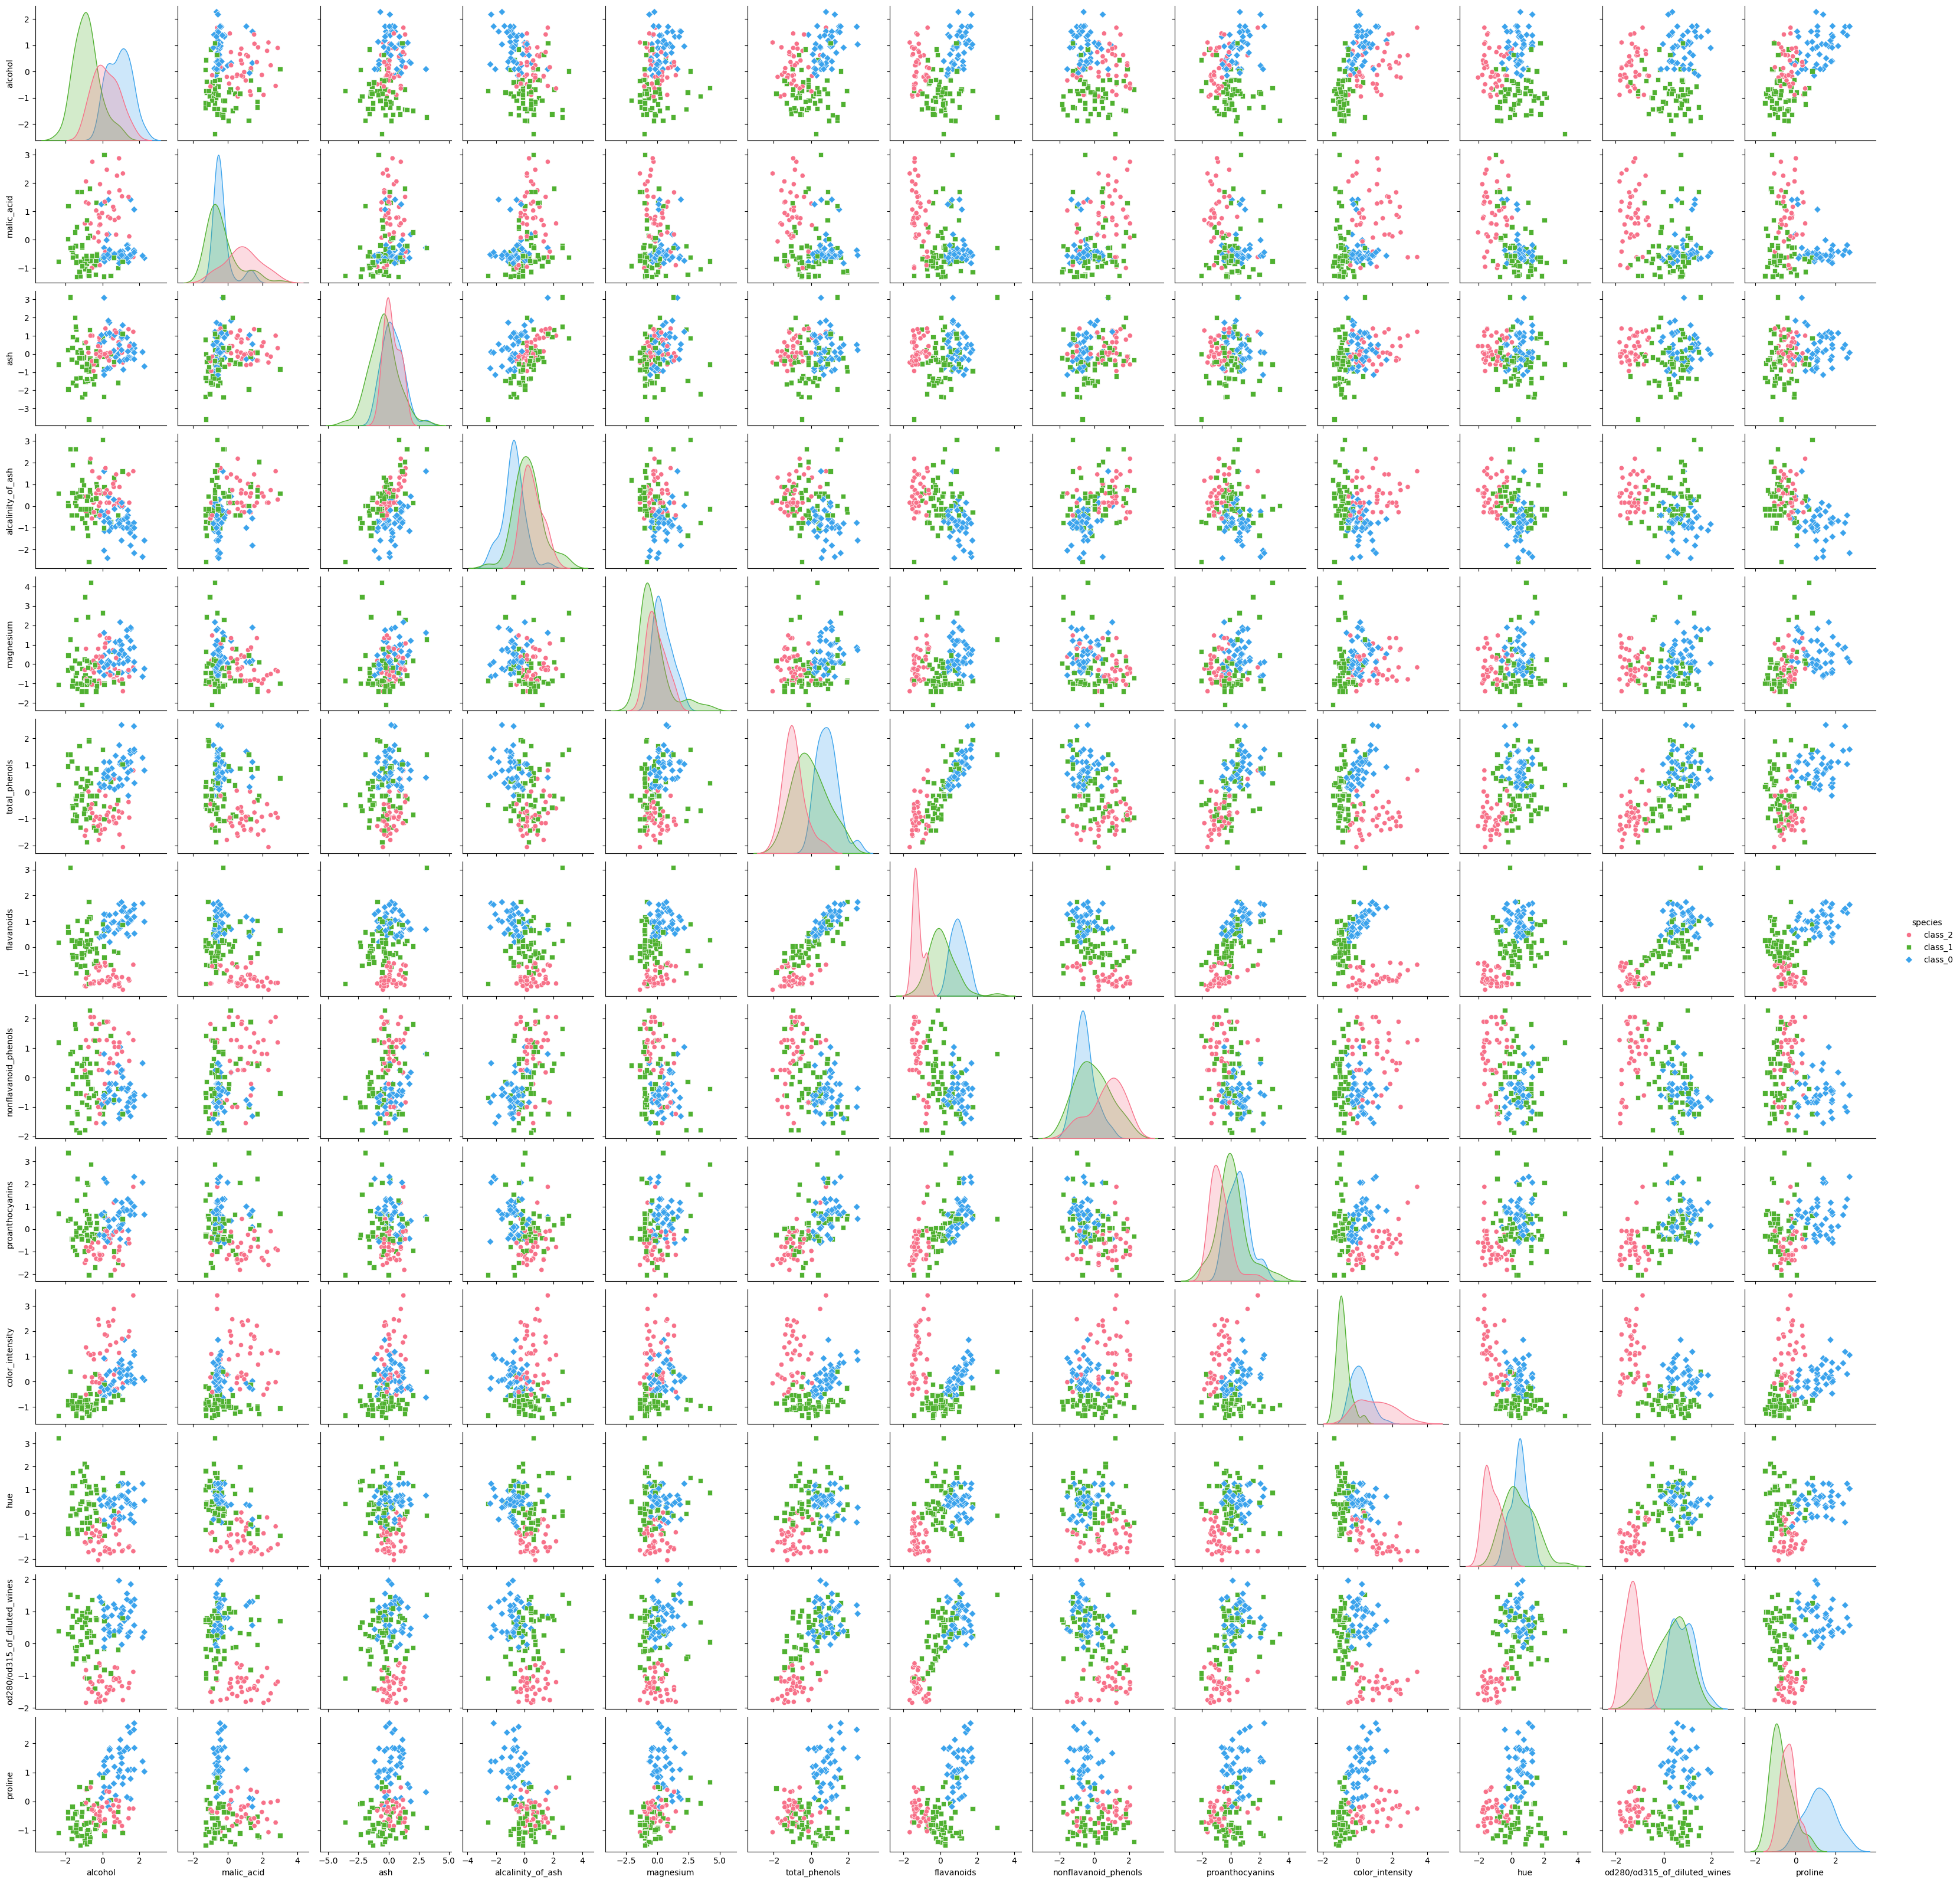

In [16]:
X_train_df = pd.DataFrame(X_train_scaled, columns=wine.feature_names).reset_index(drop = True)
y_train_df = pd.DataFrame(y_train, columns=["species"]).replace({0: "class_0", 1: "class_1", 2: "class_2"})
train_data = pd.concat([X_train_df, y_train_df], axis = 1)

sns.pairplot(train_data, hue = "species", palette="husl", markers=["o", "s", "D"])

Si bien tenemos una buena forma de separar la clase azul del resto, notamos que utilizando solamente 2 características es difícil separar las clases del problema, por tanto, probamos cada kernel utilizando todas las características.

Para ello, entrenaremos cada modelo en el set de entrenamiento y luego evaluaremos su desempeño en el de testeo (normalmente haríamos esto con el set de validación), a modo de determinar cuál obtiene una mejor capacidad de generalizar.

*(Puede tomar un tiempo en correr)*

In [17]:
kernels = ["linear", "rbf", "sigmoid", "poly"]
gammas = [0.1, 1, 10]
cs = [1, 100, 10000]
degrees = [2, 5, 10, 15]

best_accuracy = 0
best_kernel = []

for kernel in kernels:
    if kernel != "linear":
        for c in cs:
            for gamma in gammas:
                # Entregamos los parámetros para un SVM Polinomial
                if kernel == "poly":
                    for degree in degrees:
                        classifier = svm.SVC(kernel = kernel, C = c, gamma = gamma, degree = degree)
                        classifier.fit(X_train_scaled, y_train)
                        accuracy = accuracy_score(y_test, classifier.predict(X_test_scaled))

                        best_kernel.append(f"{accuracy:.3f} | {kernel} con C = {c}, gamma = {gamma} y deg = {degree}")

                        # En caso de ser el nuevo mejor clasificador
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy

                # Entregamos los parámetros para un SVM RBF o Sigmoidal
                else:
                    classifier = svm.SVC(kernel = kernel, C = c, gamma = gamma)
                    classifier.fit(X_train_scaled, y_train)
                    accuracy = accuracy_score(y_test, classifier.predict(X_test_scaled))

                    best_kernel.append(f"{accuracy:.3f} | {kernel} con C = {c} y gamma = {gamma}")

                    # En caso de ser el nuevo mejor clasificador
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy

    # Entregamos los parámetros para un SVM Lineal
    else:
        classifier = svm.SVC(kernel = kernel)
        classifier.fit(X_train_scaled, y_train)
        accuracy = accuracy_score(y_test, classifier.predict(X_test_scaled))

        best_kernel.append(f"{accuracy:.3f} | {kernel}")

    # En caso de ser el nuevo mejor clasificador
    if accuracy > best_accuracy:
        best_accuracy = accuracy

print('Mejor "accuracy" lograda:', best_accuracy)
print("----------------------------")
print('Mejores combinaciones:')
print("======================")
best_kernel = sorted(best_kernel, reverse = True)

for combinacion in best_kernel:
    print(combinacion)

Mejor "accuracy" lograda: 1.0
----------------------------
Mejores combinaciones:
1.000 | rbf con C = 10000 y gamma = 0.1
1.000 | rbf con C = 100 y gamma = 0.1
1.000 | rbf con C = 1 y gamma = 0.1
0.972 | sigmoid con C = 10000 y gamma = 0.1
0.972 | sigmoid con C = 100 y gamma = 0.1
0.972 | sigmoid con C = 1 y gamma = 0.1
0.972 | linear
0.944 | poly con C = 10000, gamma = 10 y deg = 5
0.944 | poly con C = 10000, gamma = 1 y deg = 5
0.944 | poly con C = 10000, gamma = 0.1 y deg = 5
0.944 | poly con C = 100, gamma = 10 y deg = 5
0.944 | poly con C = 100, gamma = 1 y deg = 5
0.944 | poly con C = 100, gamma = 0.1 y deg = 5
0.944 | poly con C = 1, gamma = 10 y deg = 5
0.944 | poly con C = 1, gamma = 1 y deg = 5
0.917 | poly con C = 1, gamma = 0.1 y deg = 5
0.889 | poly con C = 10000, gamma = 10 y deg = 2
0.889 | poly con C = 10000, gamma = 1 y deg = 2
0.889 | poly con C = 10000, gamma = 0.1 y deg = 2
0.889 | poly con C = 100, gamma = 10 y deg = 2
0.889 | poly con C = 100, gamma = 1 y deg = 2


Notamos que son múltiples las combinaciones que nos separan bien los datos. Esto se debe principalmente debido a que se trata de un problema relativamente simple y no tenemos tantos datos como para poder realmente determinar la calidad de cada modelo, en todo caso, notamos una clara ventaja por parte de los kernel lineal y polinomial por sobre el resto.

Es importante mencionar que el criterio utilizado para encontrar "la mejor" combinación de kernel no es el único y puede generar sesgos, por tanto es siempre importante consultar la matriz de confusión de los principales clasificadores encontrados y elegir acorde a las necesidades del problema.